In [40]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [3]:
votes = pd.read_csv('../assets/datasets/votes.csv')

In [11]:
# votes.drop('Unnamed: 0', axis=1, inplace=True)
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [9]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class    435 non-null object
V1       423 non-null object
V2       387 non-null object
V3       424 non-null object
V4       424 non-null object
V5       420 non-null object
V6       424 non-null object
V7       421 non-null object
V8       420 non-null object
V9       413 non-null object
V10      428 non-null object
V11      414 non-null object
V12      404 non-null object
V13      410 non-null object
V14      418 non-null object
V15      407 non-null object
V16      331 non-null object
dtypes: object(17)
memory usage: 57.8+ KB


Next, let's define the x and y variables: 

In [24]:
# X = votes.drop('Class',axis=1).astype(int)
x = (votes.drop('Class', axis=1).values == 'y').astype(int)
y = votes.Class.values

In [25]:
from sklearn.preprocessing import StandardScaler
x_standard = StandardScaler().fit_transform(x)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [29]:
covmat = np.cov(x_standard.T)
covmat

array([[ 1.00230415,  0.0390487 ,  0.39852965, -0.39876866, -0.34579014,
        -0.3839277 ,  0.34852066,  0.39316258,  0.29835044, -0.08243094,
         0.11277752, -0.39554734, -0.32461413, -0.34420165,  0.22041201,
         0.04178208],
       [ 0.0390487 ,  1.00230415, -0.03206322,  0.07219786,  0.13871941,
         0.14423513, -0.18752265, -0.11640995, -0.18362303, -0.09106758,
         0.21209438, -0.02518596,  0.20689251, -0.01097236, -0.1134886 ,
        -0.06281611],
       [ 0.39852965, -0.03206322,  1.00230415, -0.70307903, -0.62891934,
        -0.42649531,  0.58200314,  0.69808179,  0.55748957,  0.03150538,
         0.21382384, -0.61638291, -0.51939642, -0.55892623,  0.47481813,
         0.15910551],
       [-0.39876866,  0.07219786, -0.70307903,  1.00230415,  0.76700038,
         0.47794019, -0.54909614, -0.69360128, -0.58441675,  0.05732038,
        -0.28650904,  0.68582975,  0.56288097,  0.63562536, -0.51508594,
        -0.11060219],
       [-0.34579014,  0.13871941, -0

In [31]:
eigenValues, eigenVectors = np.linalg.eig(covmat)

Now, let's check the eigenvalues: 

In [32]:
eigenValues

array([ 7.102243  ,  1.44867882,  1.1998064 ,  0.88126251,  0.8248454 ,
        0.7380054 ,  0.14086407,  0.21188391,  0.61036665,  0.27622346,
        0.31858994,  0.35967328,  0.41340487,  0.54030753,  0.51431461,
        0.45639653])

And the eigenvectors: 

In [33]:
eigenVectors

array([[-0.18803934, -0.19357121,  0.07328808,  0.51751543,  0.35845006,
         0.62089874, -0.05713493, -0.00747574,  0.15602045, -0.03613906,
        -0.07010134, -0.20296072,  0.12290505,  0.07348099,  0.20525446,
        -0.04760145],
       [ 0.05231849, -0.5860793 , -0.23045319,  0.37516036,  0.12646973,
        -0.55398342,  0.01855198, -0.10910015,  0.10486865,  0.0799821 ,
         0.0801356 , -0.13259865, -0.06581724,  0.07925709, -0.00808044,
         0.26963501],
       [-0.29660826, -0.08013044, -0.16884543, -0.01308925,  0.10990706,
         0.03068335, -0.2133564 , -0.06665988, -0.17958811, -0.23883742,
         0.56681358,  0.45295072,  0.08181081, -0.3596669 ,  0.23464645,
         0.08418781],
       [ 0.31510691,  0.1422561 ,  0.07340739,  0.13936979, -0.00770719,
        -0.05450439, -0.39727071,  0.4526401 ,  0.17904898, -0.55964437,
         0.01205996,  0.0780124 , -0.11191782,  0.25270932,  0.01034961,
         0.24886662],
       [ 0.33401889, -0.0385968 , -0

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [34]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

7.10224299609
1.44867881863
1.19980639643
0.881262509772
0.824845400306
0.738005397126
0.610366646038
0.540307526332
0.5143146149
0.456396531035
0.413404865073
0.359673279653
0.31858993662
0.276223460272
0.211883908313
0.140864072849


Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [36]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
print(varExpl)

[44.28697500436504, 9.0334282656153384, 7.4815513800621112, 5.4952288684035526, 5.1434325248950232, 4.6019302062155623, 3.8060219020170365, 3.3691590004030161, 3.2070767653227876, 2.8459208975440626, 2.5778406816338881, 2.2427902782952089, 1.9866096622564635, 1.7224278988231507, 1.3212301179310875, 0.87837654621665939]


Now, calculate the explained variance and the Cumulative explained variance

In [38]:
cvarex = np.cumsum(varExpl)
cvarex

array([ 44.286975  ,  53.32040327,  60.80195465,  66.29718352,
        71.44061604,  76.04254625,  79.84856815,  83.21772715,
        86.42480392,  89.27072481,  91.8485655 ,  94.09135577,
        96.07796544,  97.80039334,  99.12162345, 100.        ])

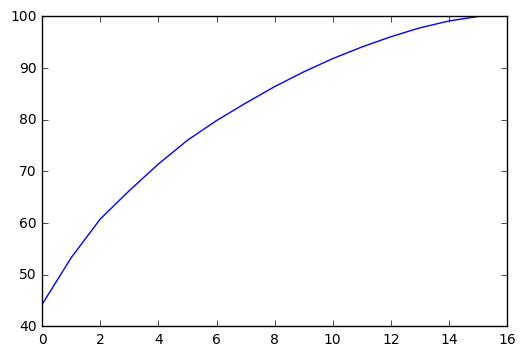

In [41]:
plt.plot(cvarex)
plt.show()

Now, conduct the PCA using scikit learn

In [51]:
from sklearn.decomposition import PCA
PCA_set = PCA(n_components=5)
Y = PCA_set.fit_transform(x_standard)


In [52]:
PCA_set.explained_variance_

array([ 7.085916  ,  1.44534852,  1.19704822,  0.87923662,  0.8229492 ])

# Case #2: Airport Delays

In [54]:
airports = pd.read_csv('../assets/datasets/airport_operations.csv')

First, let's define the x and y variables: Airport is going to be our "x" variable

In [55]:
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [56]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

Then, standardize the x variable for analysis

In [58]:
x2 = airports.ix[:,2:14].values
y2 = airports.ix[:,0].values

In [61]:
x2_standard = StandardScaler().fit_transform(x2)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [62]:
covMat = np.cov(x2_standard.T)
eigenValues2, eigenVectors2 = np.linalg.eig(covMat)

Then, check your eigenvalues and eigenvectors:

In [64]:
print eigenValues2
eigenVectors2

[  5.71594128e+00   4.10771763e+00   8.46070622e-01   4.92674626e-01
   4.68096266e-01   1.66713004e-01   8.78260266e-02   7.27989129e-02
   5.25813963e-02   2.99299918e-03   1.67049793e-04   7.05899593e-04]


array([[ -1.92844661e-01,  -3.85272521e-01,   4.00175037e-01,
          1.64039585e-01,   1.86296653e-01,   2.78156147e-01,
          7.86539360e-02,   3.17041164e-02,   7.52767812e-02,
         -1.14438376e-02,  -7.07864735e-01,  -3.44682322e-02],
       [ -1.92353674e-01,  -3.85057896e-01,   4.02190449e-01,
          1.66802678e-01,   1.84403875e-01,   2.78351867e-01,
          9.04981279e-02,   3.77083630e-02,   8.09001581e-02,
          1.35190021e-02,   7.04235896e-01,   3.71215770e-02],
       [  2.87689649e-01,  -3.33455724e-01,  -2.51323774e-01,
         -8.13357968e-02,   7.50865080e-03,   2.37735910e-02,
         -5.78177983e-02,   1.41563250e-02,   4.95309257e-01,
         -6.57324120e-01,   2.23495764e-02,  -2.32792117e-01],
       [  3.80590914e-01,  -1.72431188e-01,  -8.79462334e-02,
         -7.06458258e-02,   2.02464908e-01,   3.45123821e-03,
         -3.15914078e-01,   9.30547916e-02,   4.84973886e-01,
          6.09336471e-01,  -2.20444648e-02,   2.37173471e-01],
    

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [65]:
eigenPairs2 = [(np.abs(eigenValues2[i]), eigenVectors2[:,i]) for i in range(len(eigenValues2))]
eigenPairs2.sort()
eigenPairs2.reverse()
for i in eigenPairs2:
    print(i[0])

5.71594128131
4.10771763057
0.846070621527
0.492674626426
0.468096266456
0.166713003709
0.0878260265801
0.0727989128724
0.0525813962709
0.0029929991831
0.000705899593354
0.000167049792639


Next, Calculate the explained variance

In [66]:
totalEigen = sum(eigenValues2)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues2, reverse=True)]
cumulvarExpl = np.cumsum(varExpl)

In [67]:
cumulvarExpl

array([ 47.57620567,  81.76648321,  88.80868815,  92.9094282 ,
        96.80559213,  98.19321523,  98.92422853,  99.53016479,
        99.96782207,  99.99273407,  99.99860957, 100.        ])

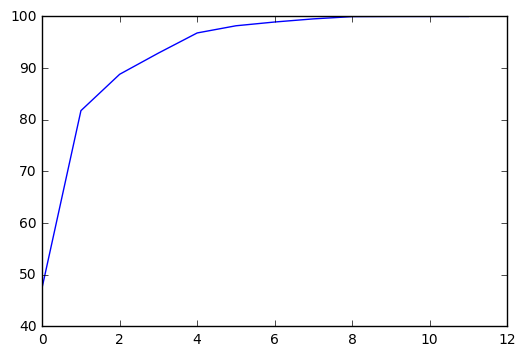

In [68]:
plt.plot(cumulvarExpl)

Finally, conduct the PCA - use the results about to guide your selection of "n" componants

In [69]:
airports_pca = PCA(n_components=2)
Y = airports_pca.fit_transform(x2_standard)

In [70]:
airports_pca.components_

array([[ 0.19284466,  0.19235367, -0.28768965, -0.38059091, -0.28589409,
         0.31936533,  0.27207765,  0.24798223,  0.39205625,  0.29898968,
         0.19035946,  0.31560337],
       [-0.38527252, -0.3850579 , -0.33345572, -0.17243119, -0.33630104,
         0.29522254, -0.3052633 , -0.32370749,  0.13695963, -0.05164521,
        -0.37717473, -0.02138591]])